# Module 5

## Import Module

In [7]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

In [8]:
# Membuat dataset acak
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)


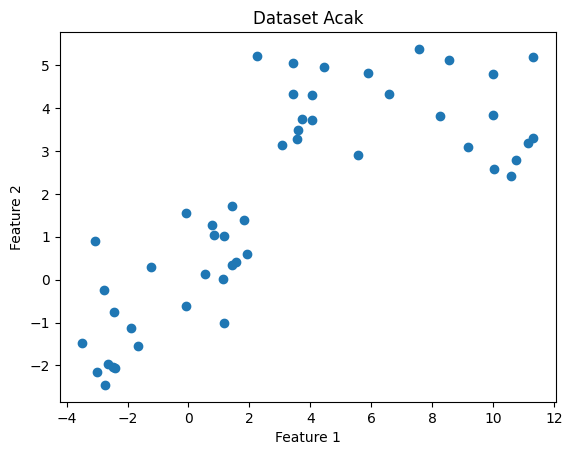

In [12]:
# Visualisasi dataset acak
plt.scatter(X1[:, 0], X1[:, 1], marker='o')
plt.title("Dataset Acak")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Membandingkan Single Linkage dan Average Linkage Dataset Random

In [13]:
single_linkage = AgglomerativeClustering(n_clusters=4, linkage='single')
y_single = single_linkage.fit_predict(X1)

average_linkage = AgglomerativeClustering(n_clusters=4, linkage='average')
y_average = average_linkage.fit_predict(X1)


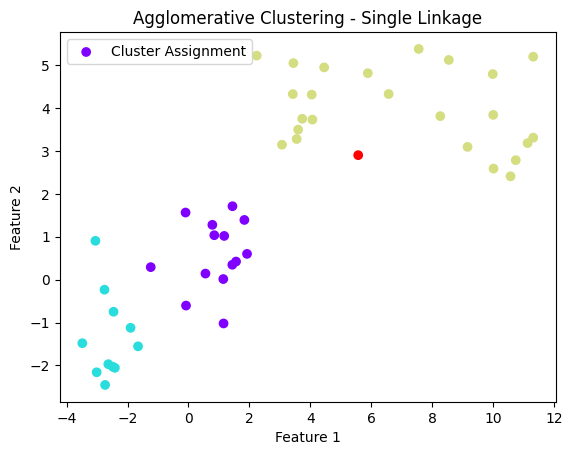

In [14]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_single, cmap='rainbow', marker='o', label='Single Linkage')
plt.title("Agglomerative Clustering - Single Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Cluster Assignment"])
plt.show()

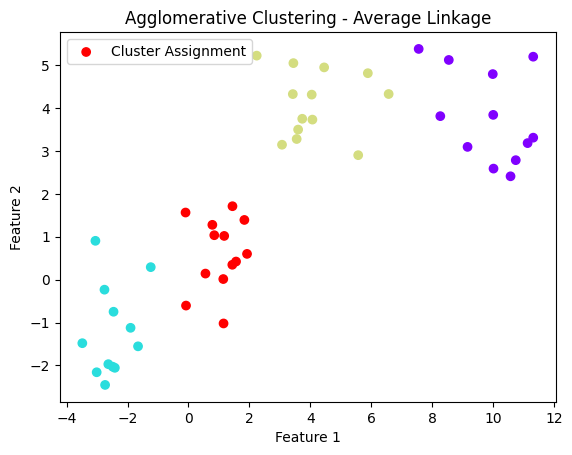

In [15]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_average, cmap='rainbow', marker='o', label='Average Linkage')
plt.title("Agglomerative Clustering - Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Cluster Assignment"])
plt.show()

**Perbedaan dari metode single linkage dan average linkage**

**Single Linkage**
Single Linkage akan mengelompokkan berdasarkan jarak terpendek antara dua titik di cluster yang berbeda.

**Average Linkage**
Average Linkage mengelompokkan data berdasarkan rata-rata jarak antara semua pasangan titik di dua cluster.

****

Dalam memvisualisasi dan perbedaan pada data yang telah kita lakukan dengan membuat data secara random. Kita bisa melihat bahwasanya :

**Single Linkage**
Memiliki Cluster yang terbentuk dapat terlihat memanjang atau tidak beraturan. Selain itu juga titik-titik yang lebih jauh dapat tetap berada dalam satu cluster jika ada jalur titik yang menghubungkannya, seperti yang bisa dilihat pada "plt.scatter" yang ditunjukkan diatas.

**Average Linkage**
Memiliki Cluster lebih berbentuk kompak dan seimbang. Average Linkage lebih baik dalam membagi data yang memiliki distribusi berdekatan.

## Membandingkan Single Linkage dan Average Linkage Dataset Cars_Clustering

### Import Dataset

In [17]:
# Load Wine Quality Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
pdf = pd.read_csv(url, sep=';')
print("Shape of dataset", pdf.shape)

pdf.head(20)

Shape of dataset (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [19]:
# If needed, convert all columns (except 'quality') to numeric and drop rows with missing values
# The 'quality' column will be excluded from the conversion since it's the target variable
pdf = pdf.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
pdf = pdf.dropna()

# Reset the index after dropping rows
pdf = pdf.reset_index(drop=True)

# Print the shape of the dataset after cleaning
print("Shape of dataset after cleaning", pdf.shape)

# Print the first 5 rows of the cleaned dataset
print(pdf.head())

Shape of dataset after cleaning (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  

In [21]:
# Select relevant columns for features (adjusted for the wine dataset)
featureset = pdf[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                  'pH', 'sulphates', 'alcohol']]

# Display the first few rows of the featureset
print(featureset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


In [22]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()

featureset = featureset.apply(pd.to_numeric, errors='coerce').dropna()

x = featureset.values

feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , 0.11643836, 0.14357262,
        0.33802817, 0.2155477 , 0.49412628, 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , 0.09589041, 0.13355593,
        0.1971831 , 0.16961131, 0.50881057, 0.40944882, 0.19161677,
        0.21538462],
       [0.5840708 , 0.10958904, 0.56      , 0.06849315, 0.10517529,
        0.22535211, 0.19081272, 0.58223201, 0.33070866, 0.1497006 ,
        0.21538462],
       [0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615]])

In [23]:
single = AgglomerativeClustering(n_clusters=6, linkage='single')
single.fit(feature_mtx)
print("Labels using Single Linkage (Scikit-learn):")
print(single.labels_)

average = AgglomerativeClustering(n_clusters=6, linkage='average')
average.fit(feature_mtx)
print("\nLabels using Average Linkage (Scikit-learn):")
print(average.labels_)

Labels using Single Linkage (Scikit-learn):
[0 0 0 ... 0 0 0]

Labels using Average Linkage (Scikit-learn):
[1 1 1 ... 1 1 1]


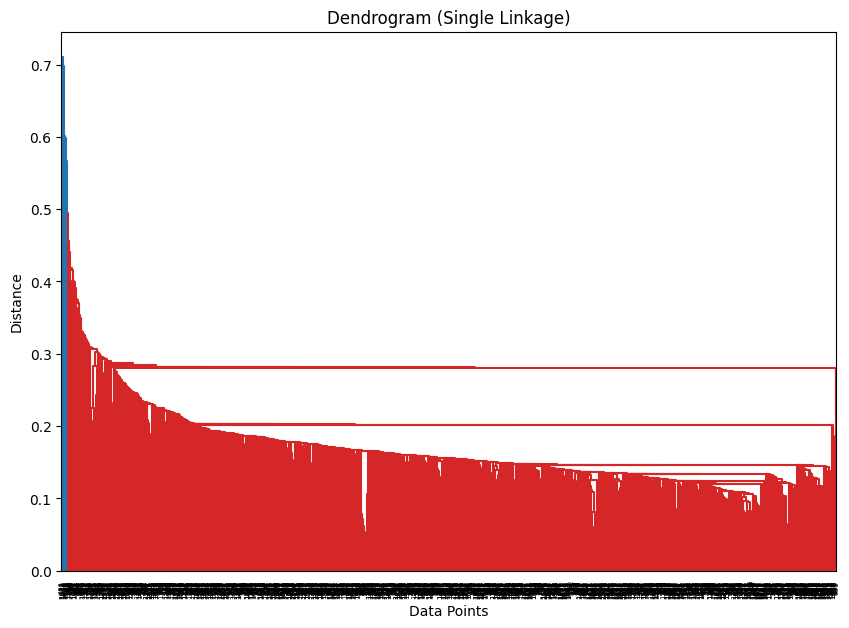

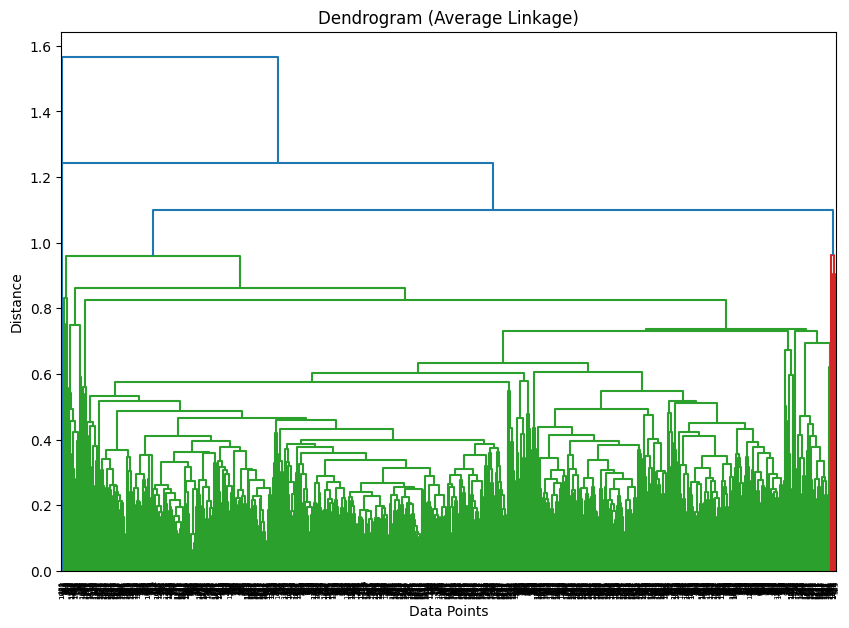

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Agglomerative Clustering menggunakan metode Single Linkage
Z_single = linkage(feature_mtx, method='single')

# Agglomerative Clustering menggunakan metode Average Linkage
Z_average = linkage(feature_mtx, method='average')

# Visualisasi Dendrogram untuk Single Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_single)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Visualisasi Dendrogram untuk Average Linkage
plt.figure(figsize=(10, 7))
dendrogram(Z_average)
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

**Penjelasan**


## Membandingkan Single Linkage, Average Linkage dan Complete Linkage Dataset Iris

### Import Module & Dataset

In [25]:
import pandas as panda
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = panda.read_csv(url, names=names)

In [28]:
print(dataset.shape)
print(dataset.head(100))

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width            Class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]


### Extract Features

In [ ]:
features = dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
target = dataset['Class']

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

### Linkage Clustering

In [ ]:
# Single Linkage Clustering using Scikit-learn
single_linkage = AgglomerativeClustering(n_clusters=3, linkage='single')
single_labels = single_linkage.fit_predict(features_scaled)

# Average Linkage Clustering using Scikit-learn
average_linkage = AgglomerativeClustering(n_clusters=3, linkage='average')
average_labels = average_linkage.fit_predict(features_scaled)

# Complete Linkage Clustering using Scikit-learn
complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_labels = complete_linkage.fit_predict(features_scaled)

# Print the labels for each method
print("\nSingle Linkage Labels:")
print(single_labels)

print("\nAverage Linkage Labels:")
print(average_labels)

print("\nComplete Linkage Labels:")
print(complete_labels)


Single Linkage Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Average Linkage Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]

Complete Linkage Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


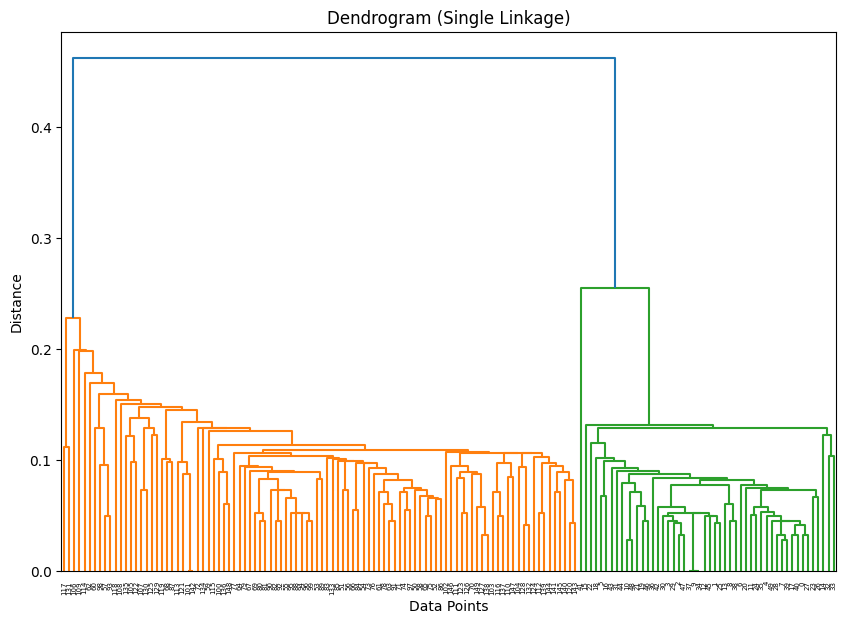

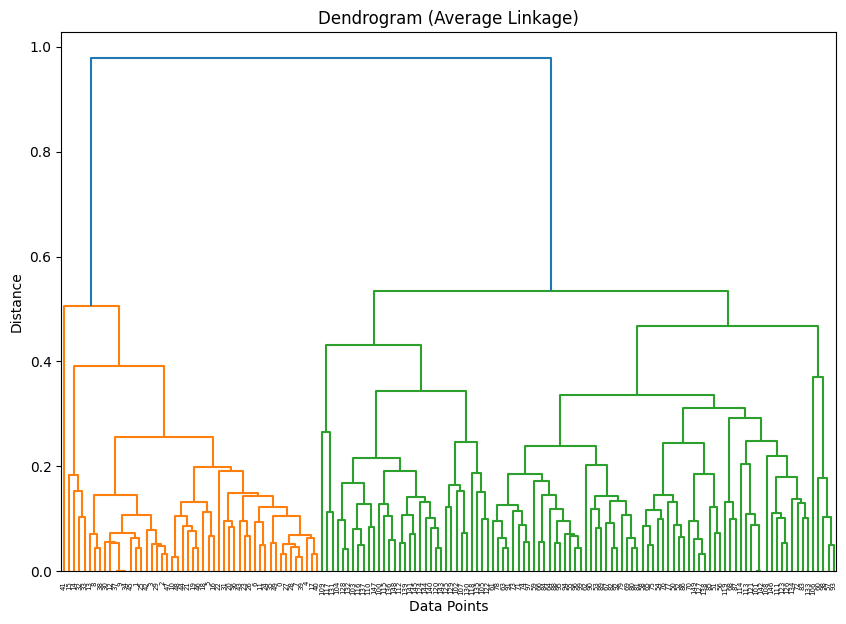

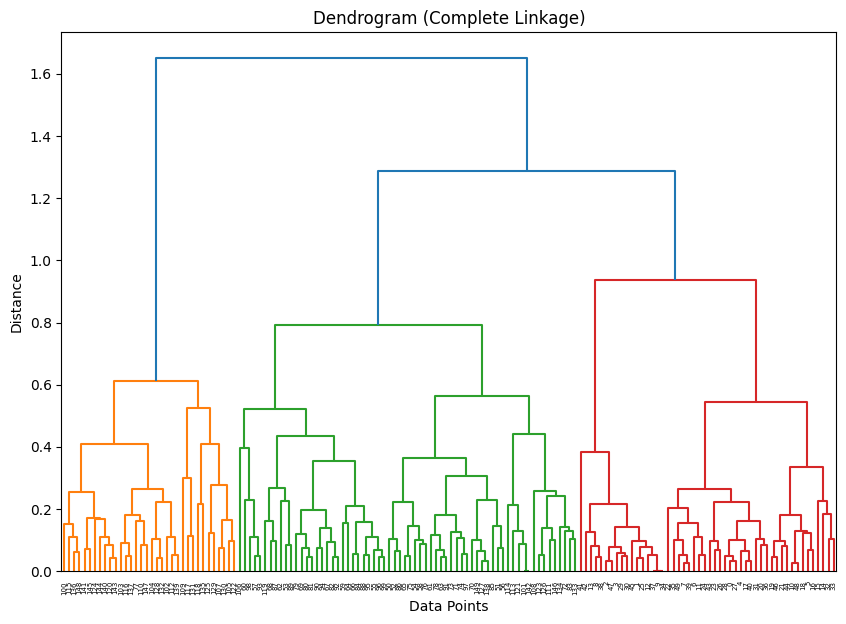

In [ ]:
Z_single = linkage(features_scaled, method='single')
plt.figure(figsize=(10, 7))
dendrogram(Z_single)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Z_average = linkage(features_scaled, method='average')
plt.figure(figsize=(10, 7))
dendrogram(Z_average)
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Z_complete = linkage(features_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(Z_complete)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

**Penjelasan**

# MODULE 6

## PDA untuk Dataset Iris

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = panda.read_csv(url, names=['sepal length', 'sepal width', 'pedal length', 'pedal width', 'Class'])

In [ ]:
features = ['sepal length', 'sepal width', 'pedal length', 'pedal width']
x = dataset.loc[:, features].values
y = dataset.loc[:, ['Class']].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [ ]:
finalDF = pd.concat([principalDf, dataset[['Class']]], axis = 1)

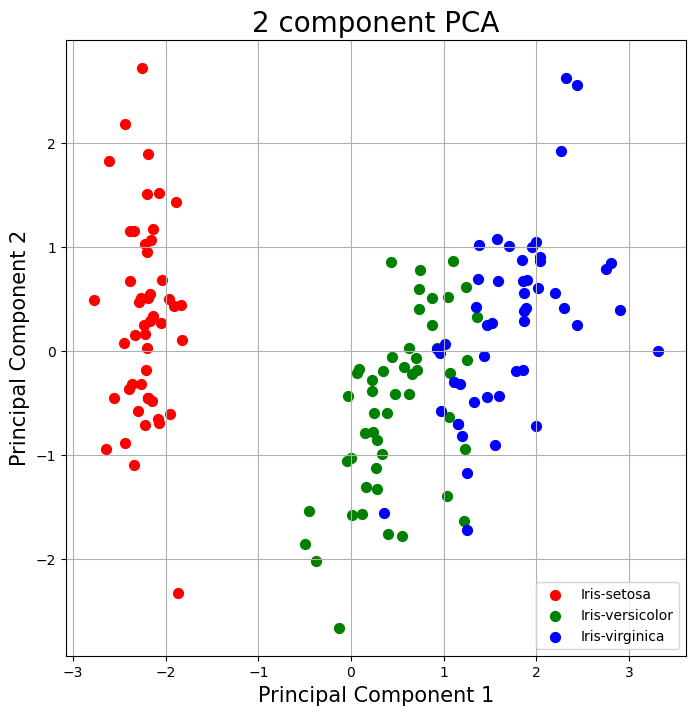

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Class'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'], finalDF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

## PDA untuk Dataset Cars

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
import pandas as pd

# URL to the wine quality dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# Load the dataset from the URL
pdf = pd.read_csv(url, delimiter=';')  # The data is separated by semicolons

# Display the first few rows of the dataset
print(pdf.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [31]:
# Update the features list based on the correct columns
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Apply transformations
x = pdf.loc[:, features].values
x = pd.DataFrame(x, columns=features).apply(pd.to_numeric, errors='coerce').dropna().values
x = StandardScaler().fit_transform(x)


In [32]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principalDf)
principalDf['Cluster'] = kmeans.labels_

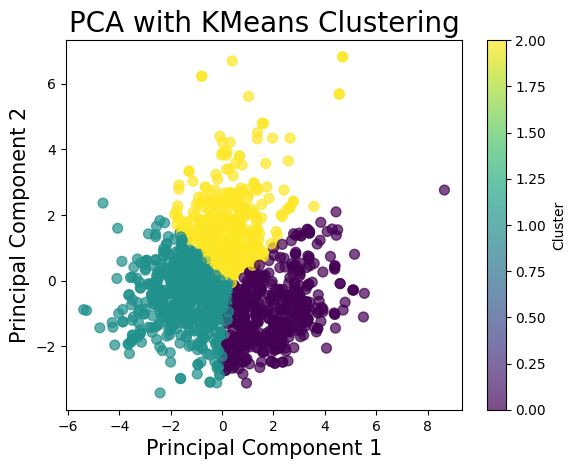

In [34]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
            c=principalDf['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('PCA with KMeans Clustering', fontsize=20)
plt.colorbar(label='Cluster')
plt.show()

In [35]:
print(pca.explained_variance_ratio_)

[0.28173931 0.1750827 ]


In [36]:
components = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
print(components)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1       0.489314         -0.238584     0.463632        0.146107   0.212247   
PC2      -0.110503          0.274930    -0.151791        0.272080   0.148052   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
PC1            -0.036158              0.023575  0.395353 -0.438520   0.242921   
PC2             0.513567              0.569487  0.233575  0.006711  -0.037554   

      alcohol  
PC1 -0.113232  
PC2 -0.386181  
